# SF CRIME DATA KAGGLE EXPLORATION

---

https://www.kaggle.com/c/sf-crime/data?test.csv.zip

This dataset contains incidents derived from SFPD Crime Incident Reporting system. The data ranges from 1/1/2003 to 5/13/2015. The training set and test set rotate every week, meaning week 1,3,5,7... belong to test set, week 2,4,6,8 belong to training set. 

Data fields

* Dates - timestamp of the crime incident
>* Category - category of the crime incident (only in train.csv). This is * the target variable we are going to predict.
>* Descript - detailed description of the crime incident (only in train.csv)
* DayOfWeek - the day of the week
* PdDistrict - name of the Police Department District
>* Resolution - how the crime incident was resolved (only in train.csv)
* Address - the approximate street address of the crime incident 
* X - Longitude
* Y - Latitude

# OBJECTIVE: PREDICT CATEGORY OF CRIME BASED ON OTHER FEATURES

---

NOTES: 
We will be predicting based on variables in the test dataset, which does not include the descrip, category, or resolution columns

>The columns we'll have left to play with are:
* Dates - timestamp of the crime incident
* Address - the approximate street address of the crime incident 
* X - Longitude
* Y - Latitude
* DayOfWeek - the day of the week
* PdDistrict - name of the Police Department District

---

### IMPORTS:

In [202]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
import pandas as pd
import numpy as np

----

#### INITIAL EXPLORATION

In [1]:
%ls

SF CRIME EXPLORATION 1.ipynb  test.csv
sampleSubmission.csv          train.csv


In [5]:
data = pd.read_csv('train.csv')
data.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


---

#### CONVERT DATES TO DATETIME, EXTRACT A COULMN FOR YEAR, MONTH, DAY, TIME

In [6]:
data['Dates'] = pd.to_datetime(data['Dates'])

In [7]:
type(data['Dates'][0])

pandas.tslib.Timestamp

In [8]:
data['year'] = data['Dates'].dt.year
data['month'] = data['Dates'].dt.month
data['time'] = data['Dates'].dt.time

In [9]:
data.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,year,month,time
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,23:53:00
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,23:53:00
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,23:33:00
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,23:30:00
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,23:30:00


---

### DOWNSAMPLE FOR PERFORMANCE

In [14]:
data2 = data.take(np.random.permutation(len(data))[:500])

In [16]:
data2.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,year,month,time
477109,2008-08-23 14:00:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM",Saturday,INGLESIDE,UNFOUNDED,600 Block of PARIS ST,-122.437324,37.718466,2008,8,14:00:00
481359,2008-08-05 02:00:00,ASSAULT,BATTERY,Tuesday,MISSION,"ARREST, BOOKED",0 Block of DIAMOND ST,-122.437174,37.761316,2008,8,02:00:00
229924,2012-04-17 12:30:00,OTHER OFFENSES,FALSE PERSONATION,Tuesday,TENDERLOIN,NONE,300 Block of ELLIS ST,-122.411966,37.784914,2012,4,12:30:00
242412,2012-02-09 14:00:00,NON-CRIMINAL,FOUND PROPERTY,Thursday,SOUTHERN,NONE,700 Block of HOWARD ST,-122.401561,37.784089,2012,2,14:00:00
336889,2010-09-11 21:11:00,OTHER OFFENSES,VIOLATION OF MUNICIPAL CODE,Saturday,CENTRAL,"ARREST, CITED",THE EMBARCADERONORTH ST / BROADWAY ST,-122.397392,37.799066,2010,9,21:11:00


---

## EXPLORING THE DOWNSAMPLED DATA

#### CATEGORY TOTALS:

In [53]:
categories = {x:0 for x in set(data2['Category'])}
categories

{'ARSON': 0,
 'ASSAULT': 0,
 'BRIBERY': 0,
 'BURGLARY': 0,
 'DISORDERLY CONDUCT': 0,
 'DRIVING UNDER THE INFLUENCE': 0,
 'DRUG/NARCOTIC': 0,
 'DRUNKENNESS': 0,
 'EXTORTION': 0,
 'FAMILY OFFENSES': 0,
 'FORGERY/COUNTERFEITING': 0,
 'FRAUD': 0,
 'KIDNAPPING': 0,
 'LARCENY/THEFT': 0,
 'LOITERING': 0,
 'MISSING PERSON': 0,
 'NON-CRIMINAL': 0,
 'OTHER OFFENSES': 0,
 'PROSTITUTION': 0,
 'ROBBERY': 0,
 'RUNAWAY': 0,
 'SECONDARY CODES': 0,
 'SEX OFFENSES FORCIBLE': 0,
 'STOLEN PROPERTY': 0,
 'SUSPICIOUS OCC': 0,
 'TRESPASS': 0,
 'VANDALISM': 0,
 'VEHICLE THEFT': 0,
 'WARRANTS': 0,
 'WEAPON LAWS': 0}

In [151]:
for x in categories:
    counter = 0
    for y in data2['Category']:
        if x == y: 
            counter += 1
    categories[x]=counter
categories

{'ARSON': 1,
 'ASSAULT': 41,
 'BRIBERY': 1,
 'BURGLARY': 12,
 'DISORDERLY CONDUCT': 5,
 'DRIVING UNDER THE INFLUENCE': 1,
 'DRUG/NARCOTIC': 22,
 'DRUNKENNESS': 1,
 'EXTORTION': 1,
 'FAMILY OFFENSES': 2,
 'FORGERY/COUNTERFEITING': 5,
 'FRAUD': 9,
 'KIDNAPPING': 4,
 'LARCENY/THEFT': 105,
 'LOITERING': 1,
 'MISSING PERSON': 13,
 'NON-CRIMINAL': 59,
 'OTHER OFFENSES': 76,
 'PROSTITUTION': 2,
 'ROBBERY': 12,
 'RUNAWAY': 3,
 'SECONDARY CODES': 6,
 'SEX OFFENSES FORCIBLE': 1,
 'STOLEN PROPERTY': 2,
 'SUSPICIOUS OCC': 20,
 'TRESPASS': 4,
 'VANDALISM': 27,
 'VEHICLE THEFT': 34,
 'WARRANTS': 25,
 'WEAPON LAWS': 5}

In [152]:
sorted_categories = sorted(categories.items(), key=lambda x: x[1],reverse=True)
sorted_categories

[('LARCENY/THEFT', 105),
 ('OTHER OFFENSES', 76),
 ('NON-CRIMINAL', 59),
 ('ASSAULT', 41),
 ('VEHICLE THEFT', 34),
 ('VANDALISM', 27),
 ('WARRANTS', 25),
 ('DRUG/NARCOTIC', 22),
 ('SUSPICIOUS OCC', 20),
 ('MISSING PERSON', 13),
 ('ROBBERY', 12),
 ('BURGLARY', 12),
 ('FRAUD', 9),
 ('SECONDARY CODES', 6),
 ('WEAPON LAWS', 5),
 ('FORGERY/COUNTERFEITING', 5),
 ('DISORDERLY CONDUCT', 5),
 ('KIDNAPPING', 4),
 ('TRESPASS', 4),
 ('RUNAWAY', 3),
 ('FAMILY OFFENSES', 2),
 ('PROSTITUTION', 2),
 ('STOLEN PROPERTY', 2),
 ('LOITERING', 1),
 ('DRIVING UNDER THE INFLUENCE', 1),
 ('ARSON', 1),
 ('DRUNKENNESS', 1),
 ('EXTORTION', 1),
 ('SEX OFFENSES FORCIBLE', 1),
 ('BRIBERY', 1)]

In [210]:
values = [x[1] for x in sorted_categories]
len(values)

30

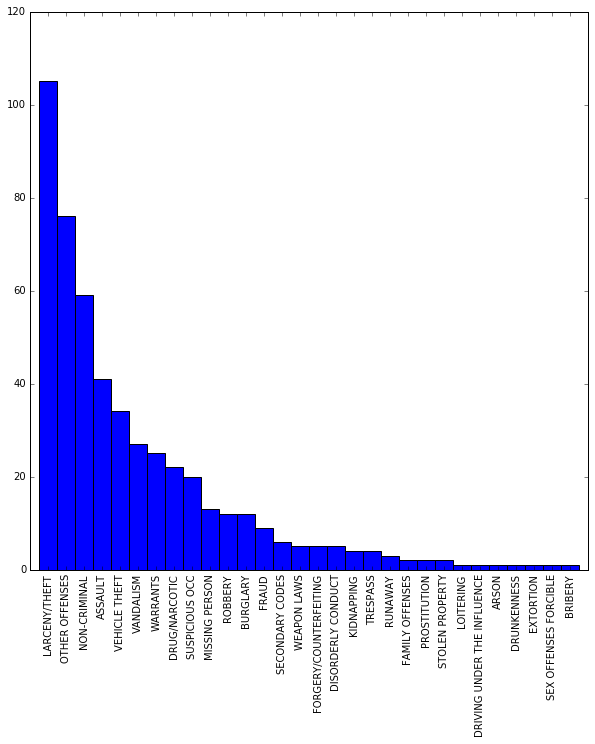

In [254]:
xlabels = [x[0] for x in sorted_categories]
x = range(len(values))
y = values
plt.figure(figsize=(10,10))
plt.xlim(-1,len(values))
plt.bar(x,y,width=1,align='center')
plt.xticks(x,xlabels,rotation='vertical')
plt.show()

---

#### CATEGORY BY DAY OF WEEK:

In [56]:
days_of_week = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
days_of_week

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [57]:
crime_type = set(data2['Category'])
crime_type

{'ARSON',
 'ASSAULT',
 'BRIBERY',
 'BURGLARY',
 'DISORDERLY CONDUCT',
 'DRIVING UNDER THE INFLUENCE',
 'DRUG/NARCOTIC',
 'DRUNKENNESS',
 'EXTORTION',
 'FAMILY OFFENSES',
 'FORGERY/COUNTERFEITING',
 'FRAUD',
 'KIDNAPPING',
 'LARCENY/THEFT',
 'LOITERING',
 'MISSING PERSON',
 'NON-CRIMINAL',
 'OTHER OFFENSES',
 'PROSTITUTION',
 'ROBBERY',
 'RUNAWAY',
 'SECONDARY CODES',
 'SEX OFFENSES FORCIBLE',
 'STOLEN PROPERTY',
 'SUSPICIOUS OCC',
 'TRESPASS',
 'VANDALISM',
 'VEHICLE THEFT',
 'WARRANTS',
 'WEAPON LAWS'}

In [90]:
crime_by_day = pd.DataFrame(columns = days_of_week,index=crime_type)
crime_by_day.head()

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
KIDNAPPING,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WEAPON LAWS,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SECONDARY CODES,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WARRANTS,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PROSTITUTION,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
crime_by_day.loc['KIDNAPPING','Monday']

nan

In [147]:
for x in crime_by_day.index:
        for y in crime_by_day.columns:
                crime_by_day.loc[x,y] = len(data2[data2.Category == x][data2.DayOfWeek == y])
crime_by_day

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
KIDNAPPING,0,0,1,0,1,2,0
WEAPON LAWS,1,1,0,0,0,3,0
SECONDARY CODES,0,0,2,1,0,3,0
WARRANTS,3,5,3,5,4,2,3
PROSTITUTION,0,0,0,1,0,0,1
LOITERING,1,0,0,0,0,0,0
DRIVING UNDER THE INFLUENCE,1,0,0,0,0,0,0
SEX OFFENSES FORCIBLE,0,0,0,0,0,0,1
ROBBERY,3,1,2,0,4,1,1
BURGLARY,2,1,3,2,2,2,0


---

### TOTAL CRIMES BY DAY

In [277]:
data2.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,year,month,time
477109,2008-08-23 14:00:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM",Saturday,INGLESIDE,UNFOUNDED,600 Block of PARIS ST,-122.437324,37.718466,2008,8,14:00:00
481359,2008-08-05 02:00:00,ASSAULT,BATTERY,Tuesday,MISSION,"ARREST, BOOKED",0 Block of DIAMOND ST,-122.437174,37.761316,2008,8,02:00:00
229924,2012-04-17 12:30:00,OTHER OFFENSES,FALSE PERSONATION,Tuesday,TENDERLOIN,NONE,300 Block of ELLIS ST,-122.411966,37.784914,2012,4,12:30:00
242412,2012-02-09 14:00:00,NON-CRIMINAL,FOUND PROPERTY,Thursday,SOUTHERN,NONE,700 Block of HOWARD ST,-122.401561,37.784089,2012,2,14:00:00
336889,2010-09-11 21:11:00,OTHER OFFENSES,VIOLATION OF MUNICIPAL CODE,Saturday,CENTRAL,"ARREST, CITED",THE EMBARCADERONORTH ST / BROADWAY ST,-122.397392,37.799066,2010,9,21:11:00


In [271]:
from collections import OrderedDict

In [283]:
day_of_week = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
day_sum = []
for x in day_of_week:
    counter = 0
    for y in data2['DayOfWeek']:
        if x == y:
            counter += 1
    day_sum.append((x,counter))
    
day_sum        

[('Monday', 65),
 ('Tuesday', 71),
 ('Wednesday', 77),
 ('Thursday', 78),
 ('Friday', 68),
 ('Saturday', 71),
 ('Sunday', 70)]

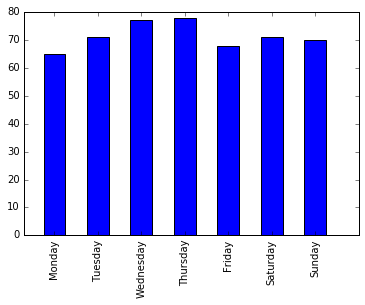

In [310]:
xlabels = [x[0] for x in day_sum]
y = [x[1] for x in day_sum]
x = range(len(y))
plt.bar(x,y,width=.5,align='center')
plt.xlim(-.7,len(y))
plt.xticks(x,xlabels,rotation='vertical')
plt.show()

---

---

---

---

---

---

---

---

---

---

---



---

---

---